### Data

In [1]:
# messages
df = pd.read_pickle('data/df.pkl')
df[:2]

,AuthorID,Author,Date,Content,Attachments,Reactions,Date_day,Date_month,Date_quarter,id1,Channel1,Channel2,Channel2_img,flg_bot,Content2,cnt_messages,cnt_reactions,cnt_attachments,cnt_words,cnt_chars,flg_join
30165,451343325018980353,sheridan_oceanprotocol,2019-08-20 19:55:00,Joined the server.,NaN,NaN,2019-08-20,2019-08,2019Q3,30165,GENERAL,general-chat,💭,0,joined the server,0,0,0,3,18,1
30166,236850565382930432,kremalicious,2019-08-20 22:22:00,Joined the server.,NaN,NaN,2019-08-20,2019-08,2019Q3,30166,GENERAL,general-chat,💭,0,joined the server,0,0,0,3,18,1


In [2]:
# new users
df_users = pd.read_pickle('data/df_users.pkl').rename(columns = {'Date_first': 'Date'})
df_users2 = df_users.groupby('Date').size().reset_index().rename(columns = {0:'users_new'})

df_users2['Date_day'] = df_users2['Date'].astype(str).str[:10]
df_users2['Date_month'] = df_users2['Date'].astype(str).str[:7]
df_users2['Date_quarter'] = df_users2['Date'].astype(str).str[:4] + 'Q' + df_users2['Date'].dt.quarter.astype(str)

df_users2[:2]

,Date,users_new,Date_day,Date_month,Date_quarter
0,2019-08-22 22:26:00,2,2019-08-22,2019-08,2019Q3
1,2019-08-22 23:37:00,1,2019-08-22,2019-08,2019Q3


In [3]:
# price
df_price = pd.read_pickle('data/df_price.pkl').reset_index().rename(columns = {'index':'Date'})[['Date','Close']]
df_price['Date_day'] = df_price['Date'].astype(str).str[:10]
df_price['Date_month'] = df_price['Date'].astype(str).str[:7]
df_price['Date_quarter'] = df_price['Date'].astype(str).str[:4] + 'Q' + df_price['Date'].dt.quarter.astype(str)
df_price

,Date,Close,Date_day,Date_month,Date_quarter
0,2020-08-19,0.55,2020-08-19,2020-08,2020Q3
1,2020-08-20,0.61,2020-08-20,2020-08,2020Q3
2,2020-08-21,0.52,2020-08-21,2020-08,2020Q3
3,2020-08-22,0.53,2020-08-22,2020-08,2020Q3
4,2020-08-23,0.59,2020-08-23,2020-08,2020Q3
...,...,...,...,...,...
1294,2024-03-05,0.95,2024-03-05,2024-03,2024Q1
1295,2024-03-06,1.17,2024-03-06,2024-03,2024Q1
1296,2024-03-07,1.18,2024-03-07,2024-03,2024Q1
1297,2024-03-08,1.17,2024-03-08,2024-03,2024Q1


### Correlations

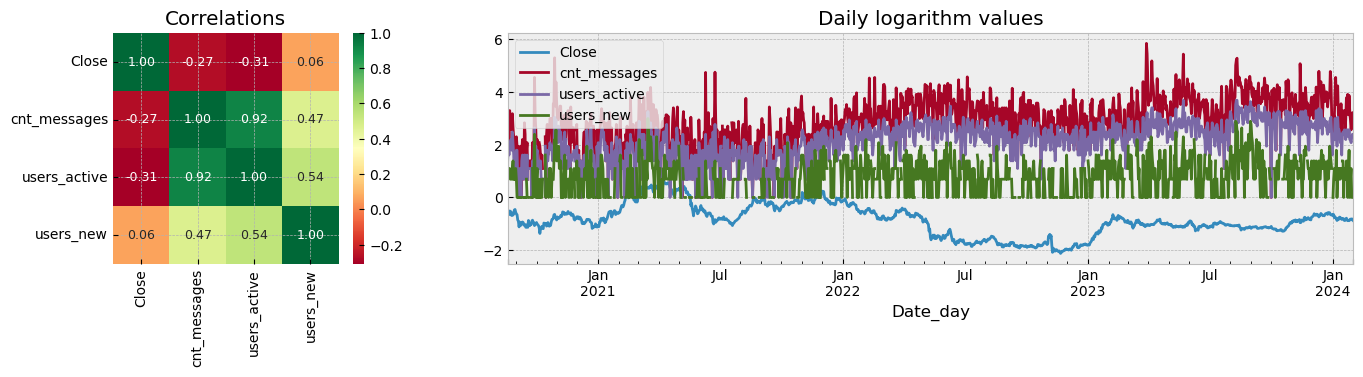

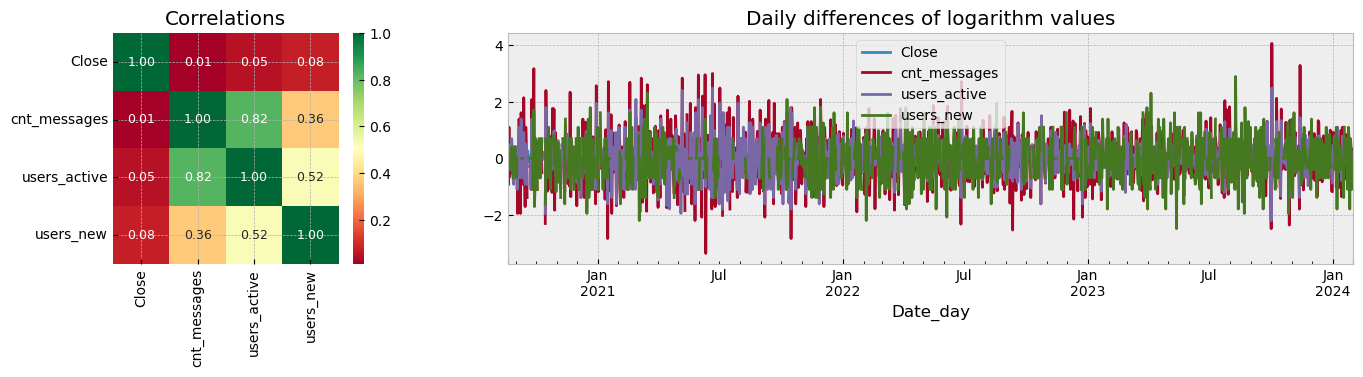

In [56]:
# 1) create table
feat_dt = 'Date_day'

# filters
f0 = df.Date < '2024-02-01'
f1 = df['flg_join'] == 0
f2 = df['flg_bot'] == 0
filt = f0&f1&f2

# aggs
df0 = df_price[df_price.Date < '2024-02-01'].groupby(feat_dt)['Close'].mean().reset_index()
df1 = df[filt].groupby(feat_dt).agg({
    'cnt_messages': sum,
    'Author': lambda x: len(set(x)),
}).reset_index().rename(columns = {'Author':'users_active'})
df2 = df_users2.groupby(feat_dt)['users_new'].sum().reset_index()

# merge
df_all = (df0
          .merge(df1, on = feat_dt, how = 'left')
          .merge(df2, on = feat_dt, how = 'left')          
         )
df_all[feat_dt] = pd.to_datetime(df_all[feat_dt])
df_all = df_all.set_index(feat_dt)

# 2) correlations
df0 = df_all.fillna(0).apply(np.log)
_, ax = plt.subplots(1,2, figsize = (16,3), width_ratios=[1, 3])
_ = sns.heatmap(df0.corr(), ax = ax[0], cmap = 'RdYlGn', annot = True, fmt = '.2f', annot_kws={"size": 9})
_ = ax[0].set_title('Correlations')
_ = df0.plot(ax = ax[1], title = 'Daily logarithm values')
# plt.tight_layout()

df0 = df_all.fillna(0).apply(np.log).diff()[1:]
_, ax = plt.subplots(1,2, figsize = (16,3), width_ratios=[1, 3])
_ = sns.heatmap(df0.corr(), ax = ax[0], cmap = 'RdYlGn', annot = True, fmt = '.2f', annot_kws={"size": 9})
_ = ax[0].set_title('Correlations')
_ = df0.plot(ax = ax[1], title = 'Daily differences of logarithm values')
# plt.tight_layout()

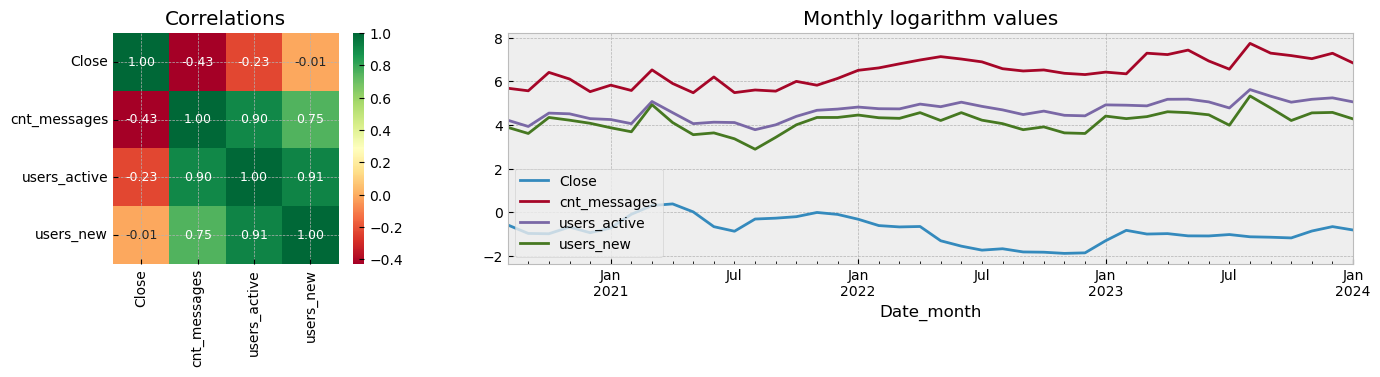

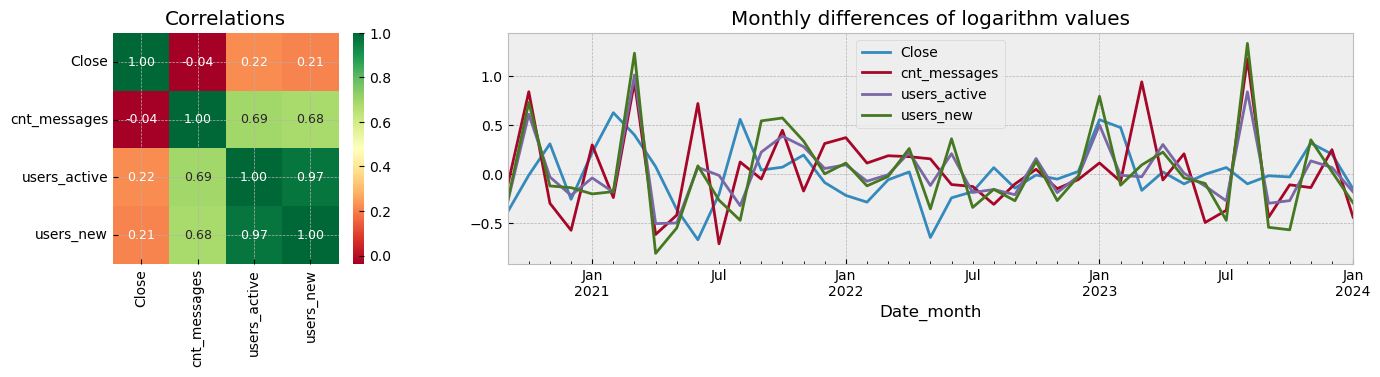

In [53]:
# 1) create table
feat_dt = 'Date_month'

# filters
f0 = df.Date < '2024-02-01'
f1 = df['flg_join'] == 0
f2 = df['flg_bot'] == 0
filt = f0&f1&f2

# aggs
df0 = df_price[df_price.Date < '2024-02-01'].groupby(feat_dt)['Close'].mean().reset_index()
df1 = df[filt].groupby(feat_dt).agg({
    'cnt_messages': sum,
    'Author': lambda x: len(set(x)),
}).reset_index().rename(columns = {'Author':'users_active'})
df2 = df_users2.groupby(feat_dt)['users_new'].sum().reset_index()

# merge
df_all = (df0
          .merge(df1, on = feat_dt, how = 'left')
          .merge(df2, on = feat_dt, how = 'left')          
         )
df_all[feat_dt] = pd.to_datetime(df_all[feat_dt])
df_all = df_all.set_index(feat_dt)

# 2) correlations
df0 = df_all.fillna(0).apply(np.log)
_, ax = plt.subplots(1,2, figsize = (16,3), width_ratios=[1, 3])
_ = sns.heatmap(df0.corr(), ax = ax[0], cmap = 'RdYlGn', annot = True, fmt = '.2f', annot_kws={"size": 9})
_ = ax[0].set_title('Correlations')
_ = df0.plot(ax = ax[1], title = 'Monthly logarithm values')
# plt.tight_layout()

df0 = df_all.fillna(0).apply(np.log).diff()[1:]
_, ax = plt.subplots(1,2, figsize = (16,3), width_ratios=[1, 3])
_ = sns.heatmap(df0.corr(), ax = ax[0], cmap = 'RdYlGn', annot = True, fmt = '.2f', annot_kws={"size": 9})
_ = ax[0].set_title('Correlations')
_ = df0.plot(ax = ax[1], title = 'Monthly differences of logarithm values')
# plt.tight_layout()

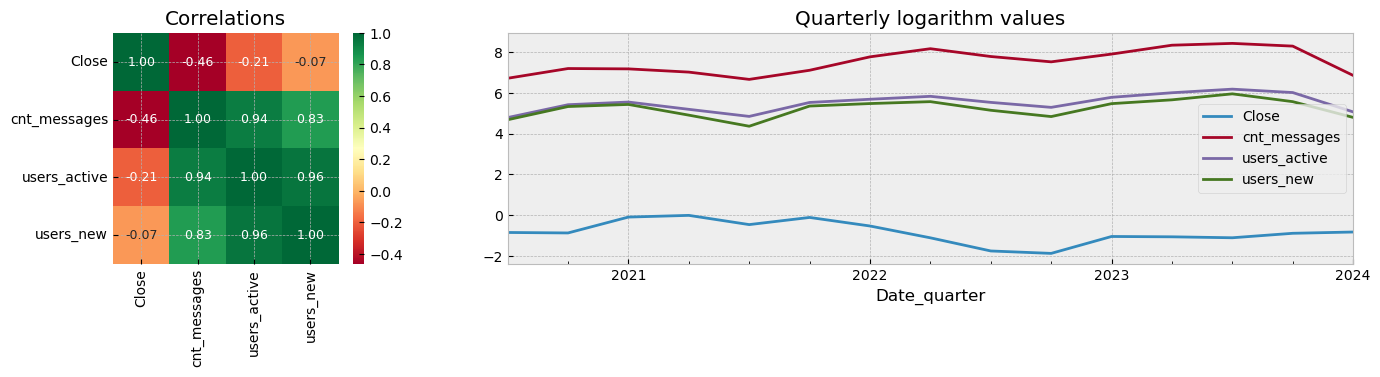

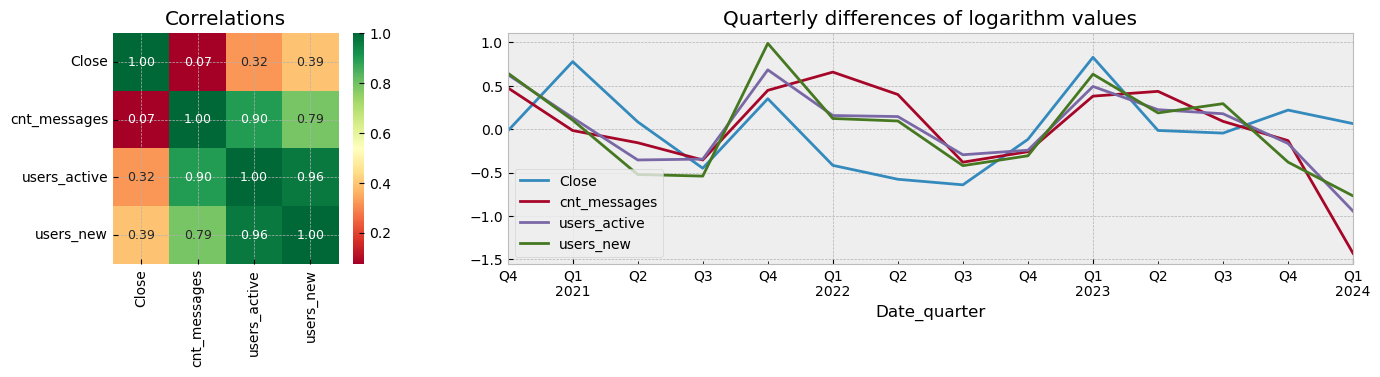

In [57]:
# 1) create table
feat_dt = 'Date_quarter'

# filters
f0 = df.Date < '2024-02-01'
f1 = df['flg_join'] == 0
f2 = df['flg_bot'] == 0
filt = f0&f1&f2

# aggs
df0 = df_price[df_price.Date < '2024-02-01'].groupby(feat_dt)['Close'].mean().reset_index()
df1 = df[filt].groupby(feat_dt).agg({
    'cnt_messages': sum,
    'Author': lambda x: len(set(x)),
}).reset_index().rename(columns = {'Author':'users_active'})
df2 = df_users2.groupby(feat_dt)['users_new'].sum().reset_index()

# merge
df_all = (df0
          .merge(df1, on = feat_dt, how = 'left')
          .merge(df2, on = feat_dt, how = 'left')          
         )
df_all[feat_dt] = pd.to_datetime(df_all[feat_dt])
df_all = df_all.set_index(feat_dt)

# 2) correlations
df0 = df_all.fillna(0).apply(np.log)
_, ax = plt.subplots(1,2, figsize = (16,3), width_ratios=[1, 3])
_ = sns.heatmap(df0.corr(), ax = ax[0], cmap = 'RdYlGn', annot = True, fmt = '.2f', annot_kws={"size": 9})
_ = ax[0].set_title('Correlations')
_ = df0.plot(ax = ax[1], title = 'Quarterly logarithm values')
# plt.tight_layout()

df0 = df_all.fillna(0).apply(np.log).diff()[1:]
_, ax = plt.subplots(1,2, figsize = (16,3), width_ratios=[1, 3])
_ = sns.heatmap(df0.corr(), ax = ax[0], cmap = 'RdYlGn', annot = True, fmt = '.2f', annot_kws={"size": 9})
_ = ax[0].set_title('Correlations')
_ = df0.plot(ax = ax[1], title = 'Quarterly differences of logarithm values')
# plt.tight_layout()